# Data Science - Linear Regression

## Getting to Know the Dataset

### Importing Libraries


In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')  # or warnings.filterwarnings(action='once')

The Dataset and Project

**Source**: Kaggle

Description: The objective of this exercise is to create a machine learning model using the Linear Regression technique to predict house prices based on a set of known features.



Data Features:


*   price: House prices
*   area: Area of the house (in square meters)
*   garage: Number of parking spots
*   bathrooms: Number of bathrooms
*   fireplace: Number of fireplaces
*   marble: Indicates whether the house has white marble finish (1) or not (0)
*   floors: Indicates whether the house has more than one floor (1) or not (0)


### Loading the Data

In [7]:
data = pd.read_csv('/content/data/HousePrices_HalfMil.csv', sep=';')

### Visualizing the Data

In [8]:
data

,price,area,garage,bathrooms,fireplace,marble,floors
0,51875,25,3,4,3,0,1
1,17875,35,1,3,1,0,0
2,47075,195,2,4,2,0,0
3,38575,33,2,2,1,0,1
4,33775,11,2,3,0,0,1
...,...,...,...,...,...,...,...
995,29150,48,1,5,4,0,0
996,43550,112,2,2,3,0,1
997,56575,185,3,4,4,0,1
998,56075,185,2,3,1,0,1


### Preliminary Analysis

In [10]:
data.describe().round(2)

,price,area,garage,bathrooms,fireplace,marble,floors
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,41985.60,124.33,2.01,3.00,2.03,0.33,0.48
std,12140.39,72.39,0.81,1.43,1.42,0.47,0.50
min,13150.00,1.00,1.00,1.00,0.00,0.00,0.00
25%,33112.50,60.75,1.00,2.00,1.00,0.00,0.00
50%,41725.00,123.00,2.00,3.00,2.00,0.00,0.00
75%,51175.00,187.00,3.00,4.00,3.00,1.00,1.00
max,73675.00,249.00,3.00,5.00,4.00,1.00,1.00


Correlation Matrix
The correlation coefficient measures the linear association between two variables, ranging from -1 to +1:

*   -1: Perfect negative correlation
*   +1: Perfect positive correlation

Observations:


*   Which features are most correlated with the target variable (Price)?
*   Are the relationships positive or negative?
*   Are there strong correlations between explanatory variables?

In [11]:
data.corr().round(4)

,price,area,garage,bathrooms,fireplace,marble,floors
price,1.0000,0.1177,0.1028,0.1244,0.1072,0.4308,0.6315
area,0.1177,1.0000,-0.0075,-0.0114,0.0121,-0.0153,-0.0180
garage,0.1028,-0.0075,1.0000,0.0671,0.0605,-0.0156,-0.0206
bathrooms,0.1244,-0.0114,0.0671,1.0000,0.0484,-0.0253,-0.0182
fireplace,0.1072,0.0121,0.0605,0.0484,1.0000,0.0296,-0.0035
marble,0.4308,-0.0153,-0.0156,-0.0253,0.0296,1.0000,-0.0065
floors,0.6315,-0.0180,-0.0206,-0.0182,-0.0035,-0.0065,1.0000


### Analyzing the Dependent Variable (Price) with Other Features

**Box Plot for the Dependent Variable**

Are there outliers?

Any noticeable trends?

Text(0, 0.5, '$')

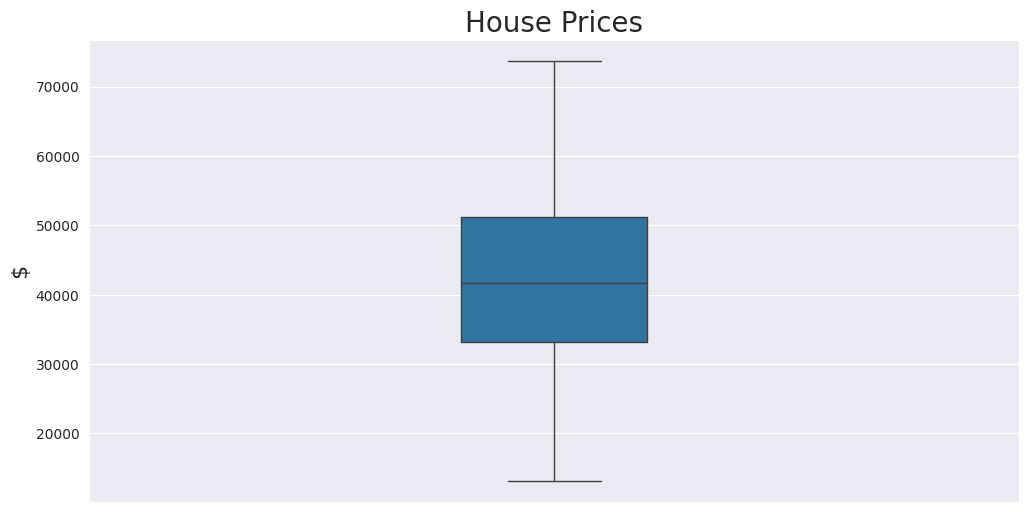

In [12]:
import seaborn as sns

## Price vs. Garage

sns.set_style("darkgrid")
ax = sns.boxplot(data=data['price'], orient='v', width=0.2)
ax.figure.set_size_inches(12, 6)
ax.set_title('House Prices', fontsize=20)
ax.set_ylabel('$', fontsize=16)


#### Price vs. Garage

<Axes: title={'center': 'Property Prices'}, xlabel='Number of Garage Spaces', ylabel='$'>

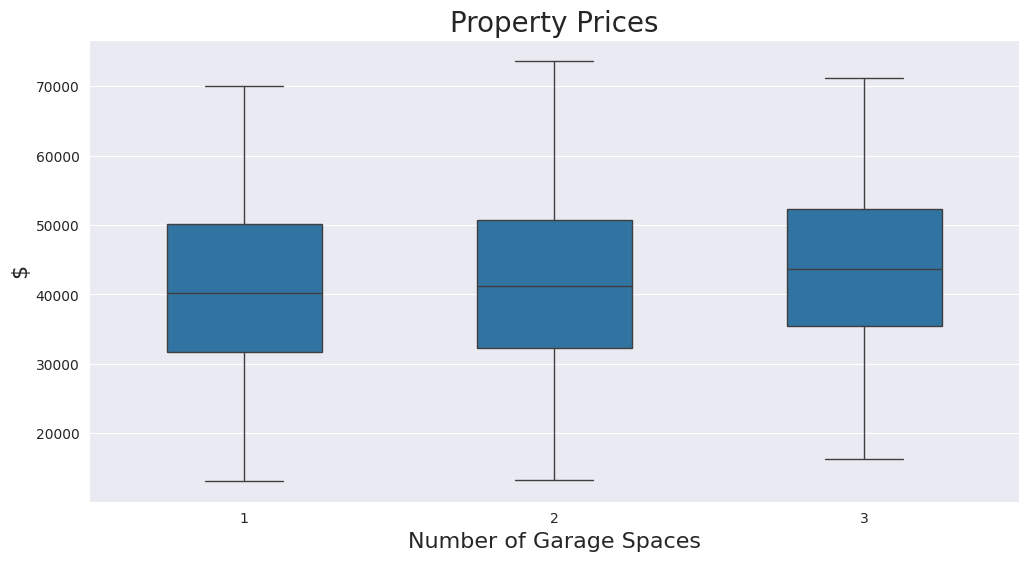

In [13]:
ax = sns.boxplot(y='price', x='garage', data=data, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Property Prices', fontsize=20)
ax.set_ylabel('$', fontsize=16)
ax.set_xlabel('Number of Garage Spaces', fontsize=16)
ax

#### Price vs. Bathrooms

<Axes: title={'center': 'Property Prices'}, xlabel='Number of Bathrooms', ylabel='$'>

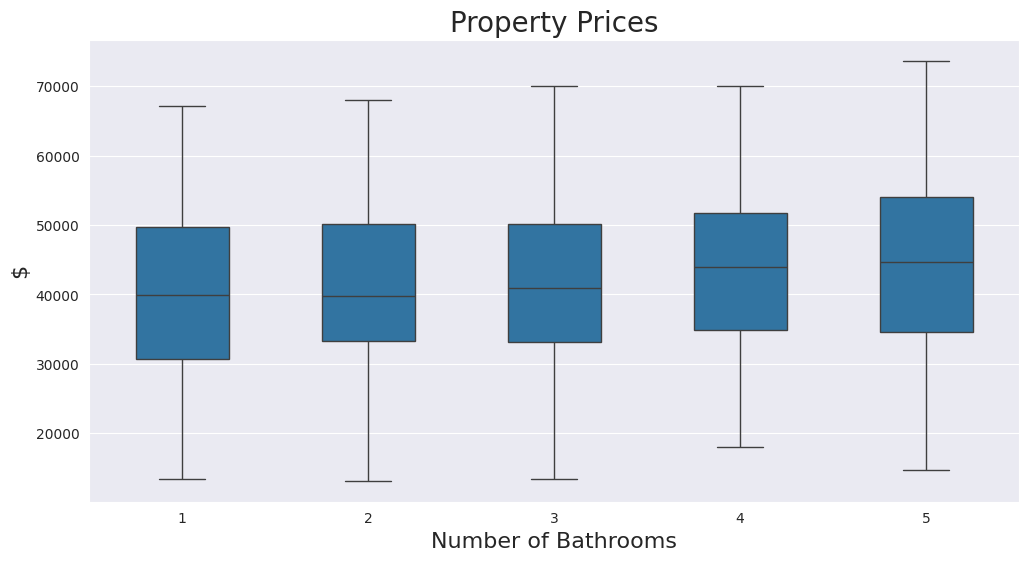

In [14]:
ax = sns.boxplot(y='price', x='bathrooms', data=data, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Property Prices', fontsize=20)
ax.set_ylabel('$', fontsize=16)
ax.set_xlabel('Number of Bathrooms', fontsize=16)
ax

#### Price vs. Fireplace

<Axes: title={'center': 'Property Prices'}, xlabel='Number of Fireplaces', ylabel='$'>

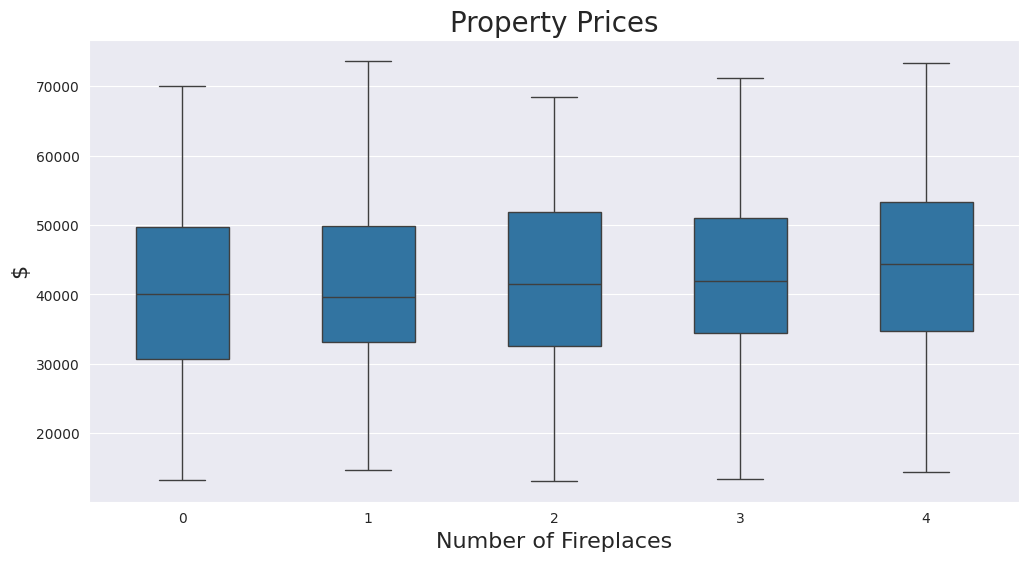

In [15]:
ax = sns.boxplot(y='price', x='fireplace', data=data, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Property Prices', fontsize=20)
ax.set_ylabel('$', fontsize=16)
ax.set_xlabel('Number of Fireplaces', fontsize=16)
ax

#### Price vs. Marble Finish

<Axes: title={'center': 'Property Prices'}, xlabel='Marble Finish', ylabel='$'>

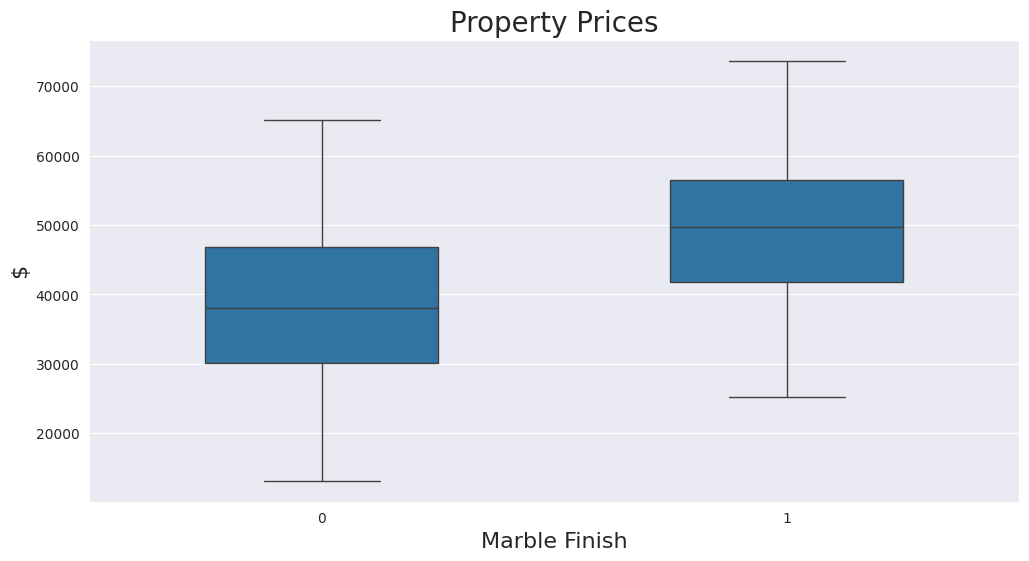

In [16]:
ax = sns.boxplot(y='price', x='marble', data=data, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Property Prices', fontsize=20)
ax.set_ylabel('$', fontsize=16)
ax.set_xlabel('Marble Finish', fontsize=16)
ax

#### Price vs. Floors

<Axes: title={'center': 'Property Prices'}, xlabel='Multiple Floors', ylabel='$'>

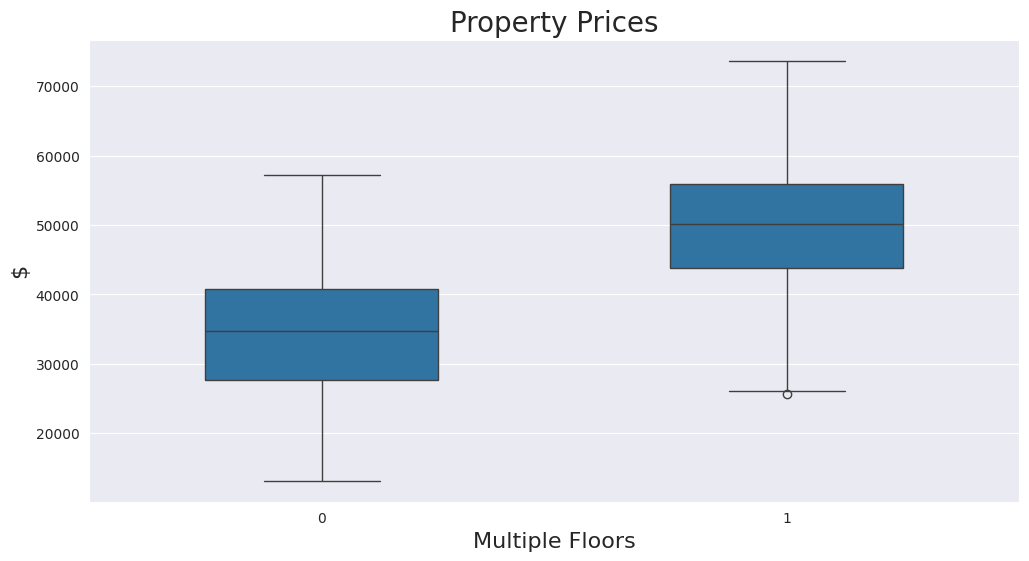

In [17]:
ax = sns.boxplot(y='price', x='floors', data=data, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Property Prices', fontsize=20)
ax.set_ylabel('$', fontsize=16)
ax.set_xlabel('Multiple Floors', fontsize=16)
ax

### Distribution of the Dependent Variable (y)

* Does the frequency distribution of the dependent variable appear skewed?
* Can we assume that the dependent variable follows a normal distribution?

<Axes: title={'center': 'Frequency Distribution'}, xlabel='$', ylabel='Frequency'>

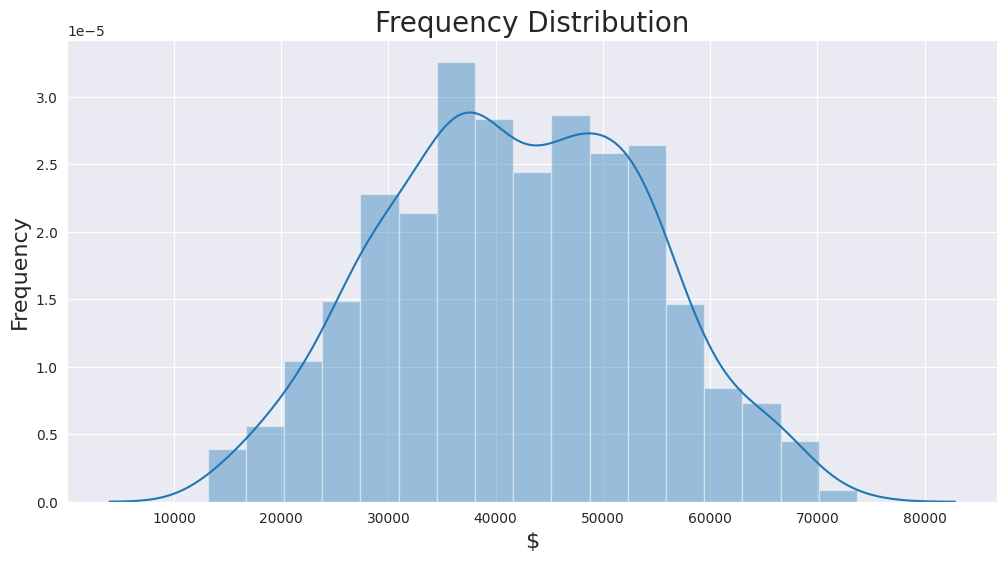

In [20]:
ax = sns.distplot(data['price'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Frequency Distribution', fontsize=20)
ax.set_ylabel('Frequency', fontsize=16)
ax.set_xlabel('$', fontsize=16)
ax

## Estimating a Linear Regression Model

In [21]:
from sklearn.model_selection import train_test_split

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Creating a Series (pandas) to store the dependent variable (y) and a DataFrame (pandas) for the explanatory variables (X):

In [22]:
y = data['price']
X = data[['area', 'garage', 'bathrooms', 'fireplace', 'marble', 'floors']]

Creating training and testing datasets:

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)

Instantiating the LinearRegression class and fit the model:

In [25]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Calculating the coefficient of determination (R²) for the model with training data:

In [30]:
print('R² = {}'.format(model.score(X_train, y_train)))

R² = 0.6362135671678268


Generating predictions using the test data:

In [31]:
y_predicted = model.predict(X_test)

Calculating the R² for predictions:

In [33]:
print('R² = {}'.format(metrics.r2_score(y_test, y_predicted)))

R² = 0.6699752959366423


### Creating a Simple Simulator

In [34]:
area = 38
garage = 2
bathrooms = 4
fireplace = 4
marble = 0
floors = 1

input_data = [[area, garage, bathrooms, fireplace, marble, floors]]
print('$ {0:.2f}'.format(model.predict(input_data)[0]))

$ 46389.80


## Summary

The initial questions for this data analysis project focused on understanding the factors that influence house prices. Specifically, the questions were:

* Do categorical features like the number of garage spaces, bathrooms, fireplaces, marble finishing, and multiple floors significantly impact house prices?

This was explored using box plots to compare how house prices vary across different categories within these features.

* What is the overall distribution of house prices?

The goal was to analyze if the prices followed a normal distribution or if they were skewed, which could impact the effectiveness of certain predictive models.

* Is there a linear relationship between house prices and continuous variables like area, garage spaces, and other features?

Scatter plots and correlation matrices were used to assess whether these relationships were strong enough to be leveraged in a regression model.

In this project, we analyzed a dataset to explore the factors influencing house prices, using features such as area, garage spaces, number of bathrooms, fireplaces, marble finishing, and whether the property has multiple floors. Initial exploratory analysis involved visualizing categorical variables with box plots, revealing that homes with more garage spaces, bathrooms, and fireplaces tend to be priced higher. Additionally, properties with marble finishes and multiple floors were generally more expensive, suggesting these features add value to real estate.

We further assessed the relationships between these features and house prices through scatter plots, revealing positive correlations between prices and variables like area and garage spaces. Using the data, we built a linear regression model to predict house prices. The model achieved an R² score of 0.64 on the training set and 0.67 on the test set, indicating that the features included explain around 67% of the variance in house prices. However, the model's moderate performance suggests there are additional factors affecting prices that were not captured in this analysis.